<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aplicaciones de simulación**

*Simulacion sistema de inventarios*

**Consideraciones:**
El sistema de inventarios que se analiza es *lote constante y tiempo entre pedidos variables*. Las variables de decisión para este modelo son la cantidad a ordenar $q$ y el nivel de reorden $R$, las cuales minimizan los costos totales del inventario (costo de ordenar, costo de llevar inventario y costo de faltante).

**Problema:** Si el inventario inicial se asume en 150 unidades, determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$




╒═══════╤══════════════════════╤════════════════════╤═══════════════════╤═══════════╕
│   Mes │   Inventario inicial │ Inventario final   │ Faltante          │   Entrega │
╞═══════╪══════════════════════╪════════════════════╪═══════════════════╪═══════════╡
│     1 │                150   │ 104.4              │ -                 │         0 │
├───────┼──────────────────────┼────────────────────┼───────────────────┼───────────┤
│     2 │                104.4 │ 69.4               │ -                 │         2 │
├───────┼──────────────────────┼────────────────────┼───────────────────┼───────────┤
│     3 │                 69.4 │ 24.400000000000006 │ -                 │         2 │
├───────┼──────────────────────┼────────────────────┼───────────────────┼───────────┤
│     4 │                 24.4 │ -                  │ 18.0              │         2 │
├───────┼──────────────────────┼────────────────────┼───────────────────┼───────────┤
│     5 │                382   │ 340.4              │ 

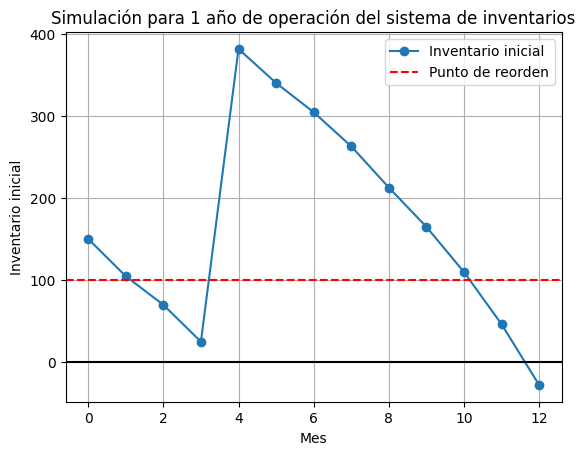

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Datos de entrada
demanda = np.array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])
prob_demanda = np.array([0.010, 0.015, 0.020, 0.020, 0.022, 0.023, 0.025, 0.027, 0.028, 0.029, 0.035, 0.045, 0.060, 0.065, 0.070, 0.080, 0.075, 0.070, 0.065, 0.060, 0.050, 0.040, 0.030, 0.016, 0.015, 0.005])
factores_estacionales = np.array([1.20, 1.00, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40])
prob_tiempo_entrega = np.array([0.30, 0.40, 0.30])

# Parámetros de simulación
inventario_inicial = 150
n_meses = 12

# Función para simular el inventario y graficar
def simular_inventario_grafico(q, R, n_meses, inventario_inicial):
    inventario = inventario_inicial
    inventario_i = [inventario_inicial]
    carga_pendiente = False
    tiempo_entrega = 0
    contador_entrega = -1
    datos = []

    for mes in range(n_meses):
        demanda_ajustada = np.random.choice(demanda, p=prob_demanda) * factores_estacionales[mes % 12]
        inv_final = inventario - demanda_ajustada

        if inv_final <= R and not carga_pendiente:
            tiempo_entrega = np.random.choice(len(prob_tiempo_entrega), p=prob_tiempo_entrega)
            carga_pendiente = True

        if carga_pendiente:
            contador_entrega += 1

        if inv_final < 0:
            faltante = abs(inv_final)
            datos.append([mes + 1, inventario, '-', faltante, tiempo_entrega])
        else:
            datos.append([mes + 1, inventario, inv_final, '-', tiempo_entrega])

        inventario = inv_final + q if contador_entrega == tiempo_entrega else inv_final

        if contador_entrega == tiempo_entrega:
            contador_entrega = -1
            inventario += 200
            carga_pendiente = False
            tiempo_entrega = 0

        inventario_i.append(inventario)

    # Imprimir tabla final (opcional)
    headers = ['Mes', 'Inventario inicial', 'Inventario final', 'Faltante', 'Entrega']
    print(tabulate(datos, headers=headers, tablefmt="fancy_grid", showindex=False))

    # Gráfico final
    plt.plot(inventario_i, marker='o', label="Inventario inicial")
    plt.title('Simulación para 1 año de operación del sistema de inventarios')
    plt.xlabel('Mes')
    plt.ylabel('Inventario inicial')
    plt.axhline(R, color="red", linestyle='--', label='Punto de reorden')
    plt.axhline(0, color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

# Valores óptimos fijos
mejor_q = 200
mejor_R = 100  # Fijar el punto de reorden en 100

# Llamar a la función para simular y graficar con los valores óptimos encontrados
simular_inventario_grafico(mejor_q, mejor_R, n_meses, inventario_inicial)
